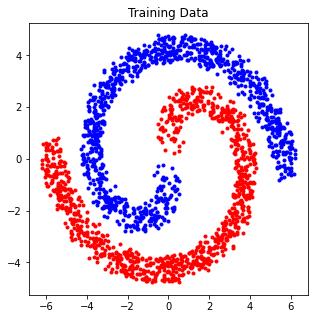

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
def spirals(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points,1)) * 360 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, Y = spirals(1000)
plt.title('Training Data')
plt.plot(X[Y==0,0], X[Y==0,1], "r.")
plt.plot(X[Y==1,0], X[Y==1,1], "b.")
plt.show()

In [22]:
class NeuralNetwork_relu(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 5
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
    
    # Rectified Linear Unit (ReLU)
    def ReLU(x):
      data = (map(lambda a: a if a>=0 else 0, x))
      return np.list(data, dtype=float)

    # Derivative for ReLU
    def der_ReLU(x):
      data = [1 if value>0 else 0 for value in x]
      return np.list(data, dtype=float)
    
    def relu(self, x, der=False):
        if der == True:
            return der_ReLU()
        else:
            return ReLU()
        
    def feedForward(self, X): 
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.relu(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.relu(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.relu(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.relu(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [ ]:
r = NeuralNetwork_relu()

err = []
for i in range(1000):
    r.train(X,Y)
    err.append(np.mean(np.square(Y - r.feedForward(X))))

plt.plot(err)